In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False , input_shape=(150, 150, 3))

In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [6]:
# without data argument

import os 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

base_dir = '/Users/phoelapyae/Documents/All/ML/Learn/dive-into-deep/data/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_feature(directory, sample_count):
    features = np.zeros((sample_count, 4, 4, 512))
    labels = np.zeros((sample_count,))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i = 0
    for input_batch, label_batch in generator:
        feature_batch = conv_base.predict(input_batch)
        features[i * batch_size: (i + 1) * batch_size] = feature_batch
        labels[i * batch_size: (i + 1) * batch_size] = label_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [7]:
train_features, train_labels = extract_feature(train_dir, 2000)
validation_features, validation_labels = extract_feature(validation_dir, 1000)
test_features, test_labels = extract_feature(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

In [12]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 27ms/step - loss: 0.5755 - acc: 0.6973 - val_loss: 0.3431 - val_acc: 0.8460
Epoch 2/30
100/100 [==============================] - 3s 26ms/step - loss: 0.3101 - acc: 0.8591 - val_loss: 0.2750 - val_acc: 0.8720
Epoch 3/30
100/100 [==============================] - 2s 24ms/step - loss: 0.2315 - acc: 0.9070 - val_loss: 0.2473 - val_acc: 0.8990
Epoch 4/30
100/100 [==============================] - 2s 24ms/step - loss: 0.2191 - acc: 0.9195 - val_loss: 0.2407 - val_acc: 0.9020
Epoch 5/30
100/100 [==============================] - 2s 24ms/step - loss: 0.1877 - acc: 0.9280 - val_loss: 0.2425 - val_acc: 0.9100
Epoch 6/30
100/100 [==============================] - 2s 25ms/step - loss: 0.1602 - acc: 0.9380 - val_loss: 0.2433 - val_acc: 0.9060
Epoch 7/30
100/100 [==============================] - 3s 29ms/step - loss: 0.1509 - acc: 0.9453 - val_loss: 0.2427 - val_acc: 0.9050
Epoch 8/30
100/100 [==============================] - 2s 23ms/step - 

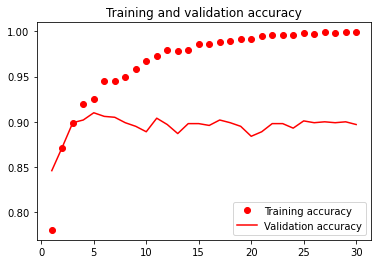

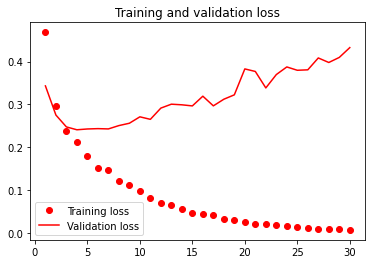

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)
plt.plot(epoch, acc, 'ro', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epoch, loss, 'ro', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.legend()
plt.title('Training and validation loss')

plt.show()

In [14]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [16]:
conv_base.trainable = False

In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, shear_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.5), loss='binary_crossentropy', metrics=['acc'])

In [21]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 470s 5s/step - loss: 9465.3363 - acc: 0.5995 - val_loss: 0.6154 - val_acc: 0.6070
Epoch 2/30
100/100 [==============================] - 492s 5s/step - loss: 9.8188 - acc: 0.5624 - val_loss: 1.1853 - val_acc: 0.5130
Epoch 3/30
100/100 [==============================] - 490s 5s/step - loss: 15.9971 - acc: 0.4988 - val_loss: 1.3983 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 535s 5s/step - loss: 0.7088 - acc: 0.5025 - val_loss: 1.4299 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 519s 5s/step - loss: 0.9623 - acc: 0.5163 - val_loss: 1.6816 - val_acc: 0.4980
Epoch 6/30
100/100 [==============================] - 494s 5s/step - loss: 4.5364 - acc: 0.5013 - val_loss: 1.4072 - val_acc: 0.4980
Epoch 7/30
100/100 [==============================] - 498s 5s/step - loss: 29.1190 - acc: 0.4939 - val_loss: 1.3985 - val_acc: 0.5000
Epoch 8/30
100/100 [==============================] - 516s 5s/st

KeyboardInterrupt: 

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.clf()
epoch = range(1, len(acc) + 1)
plt.plot(epoch, acc, 'ro', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epoch, loss, 'ro', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.legend()
plt.title('Training and validation loss')

plt.show()

In [ ]:
# fine-tune
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
# model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-5), metrics=['acc'])
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=100,
#     validation_data=validation_generator,
#     validation_steps=50)